<h3>Лабораторна робота №4<br>                                                                   
Структури для роботи з великими обсягами даних в Python</h3>
<h4>Виконав студент групи ФБ-33<br>
Лозенко Павло</h4>


Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)
Теоретичні відомості
Мінімально необхідні навички роботи із масивами та фреймами вже
отримано при виконанні лабораторних робіт 1 та 2.
За потреби можна скористатись офіційними сторінками відповідних проектів:
1) http://pandas.pydata.org/pandas-docs/version/0.15.2/index.html
2) https://docs.scipy.org/doc/scipy/</h5>

In [1]:
import os
import time
import urllib.request
from datetime import datetime
import zipfile
import pandas as pd
import numpy as np 
import missingno as ms
print("done")

done


In [6]:
directory = os.getcwd()
def download_csv(directory):
    url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
    retries = 3
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as wp:
                text = wp.read()
            break
        except urllib.error.URLError as e:
            print(f"Error downloading data: {e}")
            if attempt < retries - 1:
                print(f"Retrying download in 5 seconds...")
                time.sleep(5)
            else:
                print(f"Failed to download data after {retries} attempts.")
                continue

    filename = "Individual_Household_Electric_Power_Consumption.zip"
    filepath = os.path.join(directory, filename)

    try:
        with open(filepath, 'wb') as out:
            out.write(text)
        print(f"Process is downloading:\nfile_zip:{filename}...\n")
        print(f"File_zip:{filename} downloaded successfully.")
        print("=" * 80)
    except IOError as e:
        print(f"Error writing file {filename}: {e}")

def unzip(directory):
    zip_file = os.path.join(directory, "Individual_Household_Electric_Power_Consumption.zip")
    new_filename = 'individual_household_electric_power_consumption_2006_2010.csv'
    
    try:
        # Extract the ZIP file
        with zipfile.ZipFile(zip_file, 'r') as zip_data:
            zip_data.extractall(path=directory)
            for filename in zip_data.namelist():
                if filename.endswith('.txt'):
                    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
        # Explicitly close the zip file
        zip_data.close()
        
        # Attempt to delete the ZIP file with retries
        if os.path.exists(zip_file):
            max_retries = 5  # Increased retries
            for attempt in range(max_retries):
                try:
                    os.unlink(zip_file)
                    print(f"[+] Deleted {zip_file}")
                    break
                except PermissionError as e:
                    if attempt < max_retries - 1:
                        print(f"PermissionError: {e}. Retrying in 2 seconds... (Attempt {attempt + 1}/{max_retries})")
                        time.sleep(2)  # Increased delay
                    else:
                        print(f"Warning: Failed to delete {zip_file} after {max_retries} attempts: {e}")
                        print("This may be due to an antivirus program or another process locking the file.")
                        print("Continuing without deleting the ZIP file. You can manually delete it later.")
        print(f"Files extracted and renamed to {new_filename} successfully.")
    except Exception as e:
        print(f"Error in unzip process: {e}")

def clean_directory(directory):
    # Define the specific files to delete
    target_files = [
        "Individual_Household_Electric_Power_Consumption.zip",
        "individual_household_electric_power_consumption_2006_2010.csv"
    ]

    # Verify directory is not System32
    if directory.lower().startswith(r'c:\windows\system32'):
        raise RuntimeError(
            "Error: Directory is set to C:\\Windows\\System32. "
            "Please use a user-writable directory like Y:\\labs\\lab4."
        )

    if not os.path.exists(directory):
        os.makedirs(directory)
        print("[+] Directory created successfully.")

    if input("Do you want to clean the directory? (y/n): ").lower() == 'y':
        for filename in os.listdir(directory):
            if filename in target_files:
                filepath = os.path.join(directory, filename)
                try:
                    if os.path.isfile(filepath):
                        os.unlink(filepath)
                        print(f"[+] Deleted {filename}")
                except PermissionError as e:
                    print(f"Error deleting file {filename}: {e}")
                except Exception as e:
                    print(f"Unexpected error deleting file {filename}: {e}")
            else:
                print(f"[+] Skipped file {filename} (not a target file)")
        print("[+] Directory cleaning completed.\n")
    else:
        print("[+] Directory cleaning skipped.\n")

In [7]:
directory =r"Y:\labs\lab4"
clean_directory(directory)
download_csv(directory)
unzip(directory)

Do you want to clean the directory? (y/n):  y


[+] Skipped file .ipynb_checkpoints (not a target file)
[+] Deleted Individual_Household_Electric_Power_Consumption.zip
[+] Deleted individual_household_electric_power_consumption_2006_2010.csv
[+] Skipped file lab_4.ipynb (not a target file)
[+] Directory cleaning completed.

Process is downloading:
file_zip:Individual_Household_Electric_Power_Consumption.zip...

File_zip:Individual_Household_Electric_Power_Consumption.zip downloaded successfully.
[+] Deleted Y:\labs\lab4\Individual_Household_Electric_Power_Consumption.zip
Files extracted and renamed to individual_household_electric_power_consumption_2006_2010.csv successfully.


To_csv with pandas

In [9]:
def read_to_csv(filepath, delimiter=';'):
    try:
        data_frame = pd.read_csv(filepath, delimiter=delimiter)
        data_frame.to_csv(filepath, index=False)
        data_frame.info()
    except Exception as e:
        print(f"Error reading CSV file: {e}")

filepath = os.path.join(r"Y:\labs\lab4", "individual_household_electric_power_consumption_2006_2010.csv")
read_to_csv(filepath)

C:\Users\pavlo\AppData\Local\Temp\ipykernel_18988\928891412.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(filepath, delimiter=delimiter)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


To read_csv with numpy

In [10]:
def read_with_numpy(filepath, delimiter=';', save_csv=False, save_path=None):
    try:
        data_numpy = np.genfromtxt(filepath, delimiter=delimiter, dtype=None, encoding=None)
        if save_csv and save_path is not None:
            np.savetxt(save_path, data_numpy, delimiter=',', fmt='%s')
            print("Data saved to CSV file:", save_path)
        
        return data_numpy
    
    except Exception as e:
        print(f"Error reading CSV file with NumPy: {e}")
        return None
filepath = os.path.join(r"Y:\labs\lab4", "individual_household_electric_power_consumption_2006_2010.csv")
read_with_numpy(filepath)

array(['Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3',
       '16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0',
       '16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0',
       ..., '26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0',
       '26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0',
       '26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0'],
      shape=(2075260,), dtype='<U121')

Data clean

In [11]:
def data_cleaning(filepath):
    Dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }
    data_frame = pd.read_csv(filepath, dtype=Dtype, na_values='?')
    ms.matrix(data_frame)
    data_frame.dropna(inplace=True)
    data_frame['Date'] = pd.to_datetime(data_frame['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    data_frame['Time'] = pd.to_datetime(data_frame['Time'], format='%H:%M:%S').dt.time
    data_frame_numpy = data_frame.to_numpy()
    
    return data_frame, data_frame_numpy 

<h4>print Data Frame and Numpy array</h4>

Перші 15 рядків:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:24:00 |        4.216        |         0.418         | 234.84  |       18.4       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:27:00 |        5.388        |         0.502         |

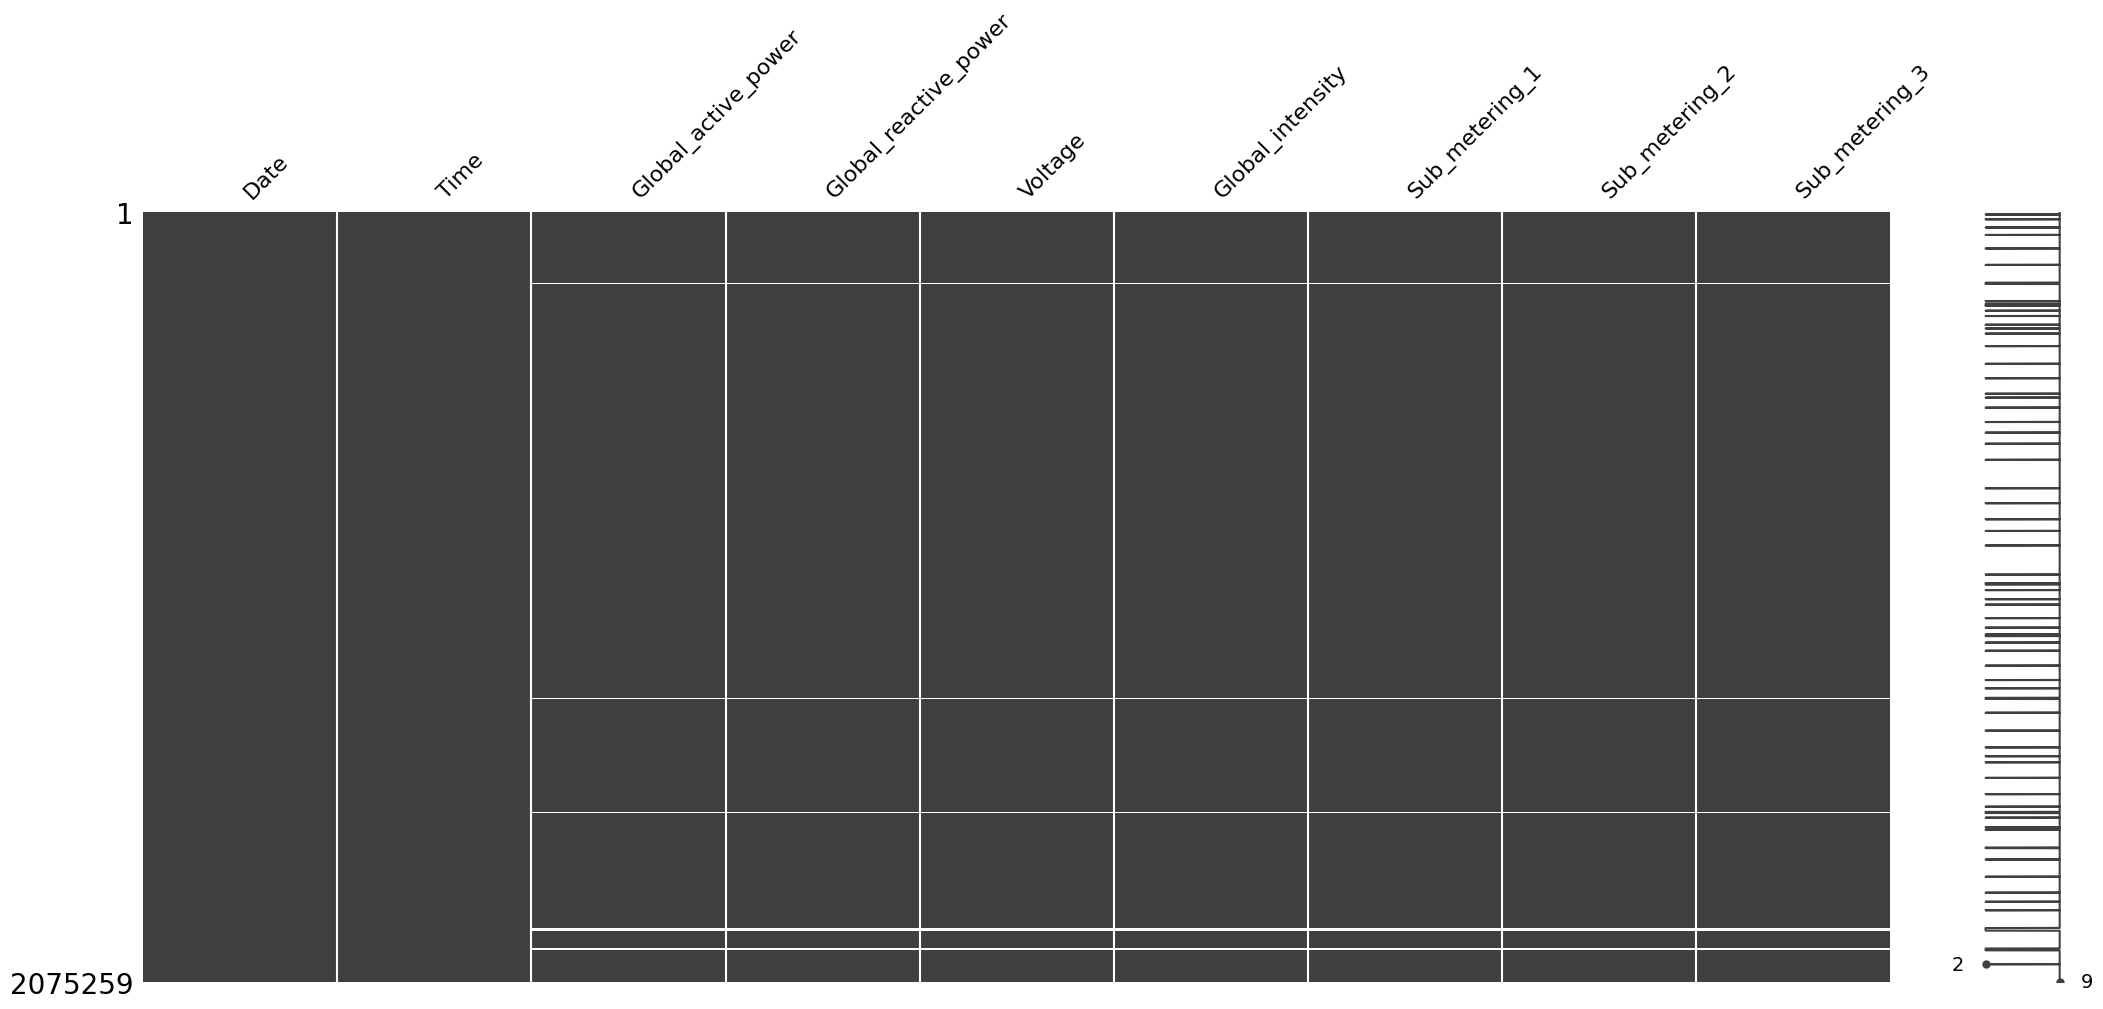

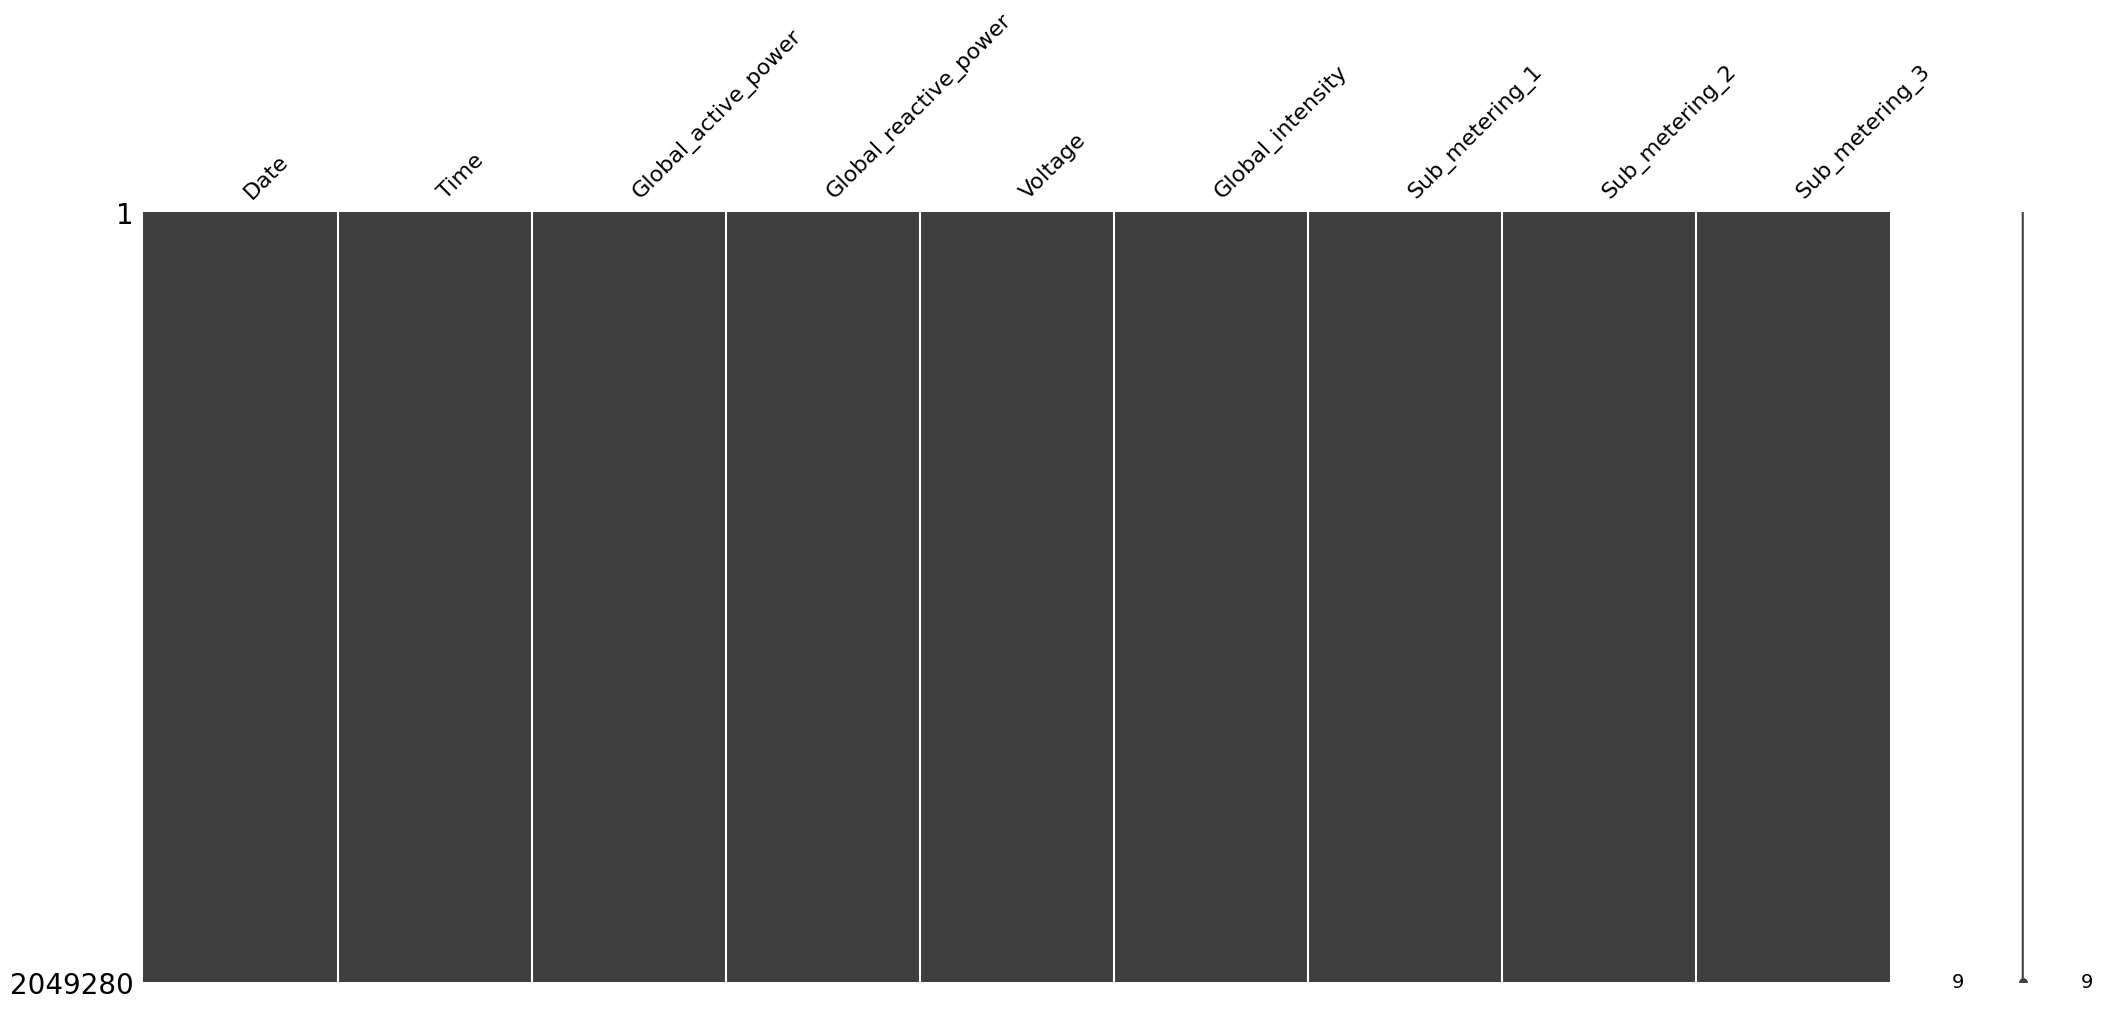

In [14]:
filepath = os.path.join(r"Y:\labs\lab4", "individual_household_electric_power_consumption_2006_2010.csv")
from tabulate import tabulate
cleaned_data_frame, cleaned_data_frame_numpy = data_cleaning(filepath)

def print_head(data):
    if isinstance(data, pd.DataFrame):
        table_data = data.head(15).values.tolist()
        headers = data.columns.tolist()
        print("Перші 15 рядків:")
        print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    elif isinstance(data, np.ndarray):
        table_data = data[:15].tolist()
        print("Перші 15 рядків:")
        print(tabulate(table_data, tablefmt='pretty'))
    else:
        print("Непідтримуваний тип даних.")

ms.matrix(cleaned_data_frame)

print_head(cleaned_data_frame)
print_head(cleaned_data_frame_numpy)


<h3>Перелік атрибутивної інформації: </h3>
date: дата виміру у форматі dd/mm/yyyy
time: час у форматі hh:mm:ss
global_active_power: активна потужність, яку споживає
домогосподарство за хвилину (усереднено) [кВт]
global_reactive_power: реактивна потужність, яку споживає
домогосподарство за хвилину (усереднено) [кВт]
voltage: напруга, усереднена за хвилину спостереження [В]
global_intensity: усереднена силу струму для домогосподарства [A]
sub_metering_1: набір споживачів енергії No1 [Вт-годин активної
енергії], відповідає кухні, на якій є машина для миття посуду на
мікрохвильовка (електричної плити немає, використовується газова).
sub_metering_2: набір споживачів енергії No2 [Вт-годин активної
енергії], відповіє пральні, в якій працює пральна машина, сушарка,
холодильних та ввімкнено світло.
sub_metering_3: набір споживачів енергії No3 [Вт-годин активної
енергії], відповідає бойлеру та кондиціонеру.

<h4> Завдання першого рівня </h4>

Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [15]:
def household_df(cleaned_data_frame):
    start_time = time.time()
    active_power_df = cleaned_data_frame[cleaned_data_frame["Global_active_power"] > 5.0] 
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    return active_power_df

def household_numpy(cleaned_data_frame_numpy):
    start_time = time.time()
    indices = np.where(cleaned_data_frame_numpy[:, 2] > 5)
    active_power_np = cleaned_data_frame_numpy[indices]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return active_power_np


In [16]:
household_df_result = household_df(cleaned_data_frame)
household_numpy_result = household_numpy(cleaned_data_frame_numpy)
print_head(household_df_result)
print_head(household_numpy_result) 

Час виконання для DataFrame: 0.015060186386108398
Час виконання для NumPy: 0.08774590492248535
Перші 15 рядків:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:25:00 |        5.36         |         0.436         | 233.63  |       23.0       |      0.0       |      1.0       |      16.0      |
| 2006-12-16 | 17:26:00 |        5.374        |         0.498         | 233.29  |       23.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:27:00 |        5.388        |         0.502         | 233.74  |       23.0       |      0.0       |      1.0  

Обрати всі домогосподарства, у яких вольтаж перевищую 235 В. 

In [17]:
def household_df_2(cleaned_data_frame):
    start_time = time.time()
    cleaned_data_frame_voltage = cleaned_data_frame[cleaned_data_frame["Voltage"] > 235]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    return cleaned_data_frame_voltage

def household_numpy_2(cleaned_data_frame_numpy):
    start_time = time.time()
    indices = np.where(cleaned_data_frame_numpy[:, 4] > 235)
    cleaned_data_frame_voltage_numpy = cleaned_data_frame_numpy[indices]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return cleaned_data_frame_voltage_numpy

In [18]:
household_df_result_2 = household_df_2(cleaned_data_frame)
household_numpy_result_2 = household_numpy_2(cleaned_data_frame_numpy)
print_head(household_df_result_2)
print_head(household_numpy_result_2) 

Час виконання для DataFrame: 0.16059446334838867
Час виконання для NumPy: 0.2031240463256836
Перші 15 рядків:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:28:00 |        3.666        |         0.528         | 235.68  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:29:00 |        3.52         |         0.522         | 235.02  |       15.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:30:00 |        3.702        |         0.52          | 235.09  |       15.8       |      0.0       |      1.0    

Час виконання для NumPy: 0.253464937210083
Перші 15 рядків DataFrame:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 17:28:00 |        3.666        |         0.528         | 235.68  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:29:00 |        3.52         |         0.522         | 235.02  |       15.0       |      0.0       |      2.0       |      17.0      |
| 2006-12-16 | 17:30:00 |        3.702        |         0.52          | 235.09  |       15.8       |      0.0       |      1.0       |      17.0      |
| 2006-12-16 | 17:

Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [19]:
def household_df_3(cleaned_data_frame):
    start_time = time.time() 
    filtered_households = cleaned_data_frame[(cleaned_data_frame["Global_intensity"] >= 19) & (cleaned_data_frame["Global_intensity"] <= 20)]
    filtered_households = filtered_households[(filtered_households["Sub_metering_2"] > filtered_households["Sub_metering_3"])]
    end_time = time.time() 
    execution_time = end_time - start_time  
    print("Час виконання для DataFrame:", execution_time)
    return filtered_households

def household_numpy_3(cleaned_data_frame_numpy):
    start_time = time.time()
    filtered_households = cleaned_data_frame_numpy[
        (cleaned_data_frame_numpy[:, 5] >= 19) & 
        (cleaned_data_frame_numpy[:, 5] <= 20)
    ]
    filtered_households = filtered_households[
        (filtered_households[:, 7] > filtered_households[:, 8])
    ]
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return filtered_households     

In [20]:
household_df_result_3 = household_df_3(cleaned_data_frame)
household_numpy_result_3 = household_numpy_3(cleaned_data_frame_numpy)
print_head(household_df_result_3)
print_head(household_numpy_result_3) 

Час виконання для DataFrame: 0.011049747467041016
Час виконання для NumPy: 0.14353132247924805
Перші 15 рядків:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 18:09:00 |        4.464        |         0.136         | 234.66  |       19.0       |      0.0       |      37.0      |      16.0      |
| 2006-12-17 | 01:04:00 |        4.582        |         0.258         | 238.08  |       19.6       |      0.0       |      13.0      |      0.0       |
| 2006-12-17 | 01:08:00 |        4.618        |         0.104         | 239.61  |       19.6       |      0.0       |      27.0 

Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії.

In [21]:
def household_df_4(data_frame, n_samples=500000):
    start_time = time.time()
    random_households = data_frame.sample(n=n_samples, replace=False)
    mean_values = random_households[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    return mean_values

def household_numpy_4(data_frame_numpy, n_samples=500000):
    start_time = time.time()
    random_indices = np.random.choice(data_frame_numpy.shape[0], size=n_samples, replace=False)
    random_households = data_frame_numpy[random_indices]
    mean_values = np.mean(random_households[:, 6:9], axis=0)
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    return mean_values


In [24]:
household_df_result_4 = household_df_4(cleaned_data_frame)
household_numpy_result_4 = household_numpy_4(cleaned_data_frame_numpy)
print("\n DataFrame результати:")
print("Sub_metering_1:", household_df_result_4["Sub_metering_1"])
print("Sub_metering_2:", household_df_result_4["Sub_metering_2"])
print("NumPy результат:")
print(household_numpy_result_4)
print()

Час виконання для DataFrame: 0.3820977210998535
Час виконання для NumPy: 1.3606486320495605

 DataFrame результати:
Sub_metering_1: 1.119124
Sub_metering_2: 1.284634
NumPy результат:
[1.126472 1.29371 6.459546]



Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [25]:
def household_df_5(cleaned_data_frame):
    start_time = time.time()
    
    selected_households = cleaned_data_frame[
        (cleaned_data_frame['Time'] > datetime.strptime('18:00:00', '%H:%M:%S').time()) &
        (cleaned_data_frame['Global_active_power'] > 6) &
        (cleaned_data_frame['Sub_metering_2'] > cleaned_data_frame['Sub_metering_1']) &
        (cleaned_data_frame['Sub_metering_2'] > cleaned_data_frame['Sub_metering_3'])
    ]

    midpoint = len(selected_households) // 2
    
    group1 = selected_households.iloc[:midpoint]
    group2 = selected_households.iloc[midpoint:]
    
    result_group1 = group1.iloc[::3]
    result_group2 = group2.iloc[::4]
    
    result_df = pd.concat([result_group1, result_group2])
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для DataFrame:", execution_time)
    
    return result_df


def household_numpy_5(cleaned_data_frame_numpy):
    start_time = time.time()

    selected_time_power = cleaned_data_frame_numpy[cleaned_data_frame_numpy[:, 1] > datetime.strptime('18:00:00', '%H:%M:%S').time()]
    selected_households = selected_time_power[selected_time_power[:, 2] > 6]
    selected_households = selected_households[(selected_households[:, 7] > selected_households[:, 6]) & 
                                              (selected_households[:, 7] > selected_households[:, 8])]
    
    midpoint = len(selected_households) // 2
    
    group1 = selected_households[:midpoint]
    group2 = selected_households[midpoint:]
    
    result_group1 = group1[::3]
    result_group2 = group2[::4]
    
    result_np = np.concatenate([result_group1, result_group2])
    
    end_time = time.time()
    execution_time = end_time - start_time
    print("Час виконання для NumPy:", execution_time)
    
    return result_np

In [26]:
household_df_result_5 = household_df_5(cleaned_data_frame)
print_head(household_df_result_5) 

household_numpy_result_5 = household_numpy_5(cleaned_data_frame_numpy)
print_head(household_numpy_result_5) 

Час виконання для DataFrame: 0.11941313743591309
Перші 15 рядків:
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
|    Date    |   Time   | Global_active_power | Global_reactive_power | Voltage | Global_intensity | Sub_metering_1 | Sub_metering_2 | Sub_metering_3 |
+------------+----------+---------------------+-----------------------+---------+------------------+----------------+----------------+----------------+
| 2006-12-16 | 18:05:00 |        6.052        |         0.192         | 232.93  |       26.2       |      0.0       |      37.0      |      17.0      |
| 2006-12-16 | 18:08:00 |        6.308        |         0.116         | 232.25  |       27.0       |      0.0       |      36.0      |      17.0      |
| 2006-12-28 | 20:58:00 |        6.386        |         0.374         | 236.63  |       27.0       |      1.0       |      36.0      |      17.0      |
| 2006-12-28 | 21:02:0

Висновки:<br>
Оцінка DataFrame - 4.9<br>
Оцінка Numpy - 4.5<br>

<table border="1">
	<thead>
		<tr>
			<th>Тип структури даних</th>
			<th>Завдання 1</th>
			<th>Завдання 2</th>
			<th>Завдання 3</th>
			<th>Завдання 4</th>
			<th>Завдання 5</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>DataFrame</td>
			<td>0.0062</td>
			<td>0.1145</td>
			<td>0.0114</td>
			<td>0.2403</td>
			<td>0.0706</td>
		</tr>
		<tr>
			<td>Numpy</td>
			<td>0.0338</td>
			<td>0.2091</td>
			<td>0.0651</td>
			<td>0.6901</td>
			<td>0.0846</td>
		</tr>
	</tbody>
</table>